In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
data = pd.read_csv('Hotel_Reviews.csv')

In [4]:
data=data.drop(index = list(range(data.shape[0] // 16, data.shape[0])))

In [5]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               2014 non-null   object 
 1   Additional_Number_of_Scoring                2014 non-null   int64  
 2   Review_Date                                 2014 non-null   object 
 3   Average_Score                               2014 non-null   float64
 4   Hotel_Name                                  2014 non-null   object 
 5   Reviewer_Nationality                        2014 non-null   object 
 6   Negative_Review                             2014 non-null   object 
 7   Review_Total_Negative_Word_Counts           2014 non-null   int64  
 8   Total_Number_of_Reviews                     2014 non-null   int64  
 9   Positive_Review                             2014 non-null   object 
 10  Review_Total

In [7]:
print('Признаки, имеющие максимальную по модулю корреляцию со средней оценкой')
best_params = data.corr()['Average_Score'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.3]
best_params

Признаки, имеющие максимальную по модулю корреляцию со средней оценкой


C:\Users\noski\AppData\Local\Temp\ipykernel_10740\955532171.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  best_params = data.corr()['Average_Score'].map(abs).sort_values(ascending=False)[1:]


Total_Number_of_Reviews         0.928197
Additional_Number_of_Scoring    0.888086
lng                             0.843443
lat                             0.838948
Reviewer_Score                  0.399864
Name: Average_Score, dtype: float64

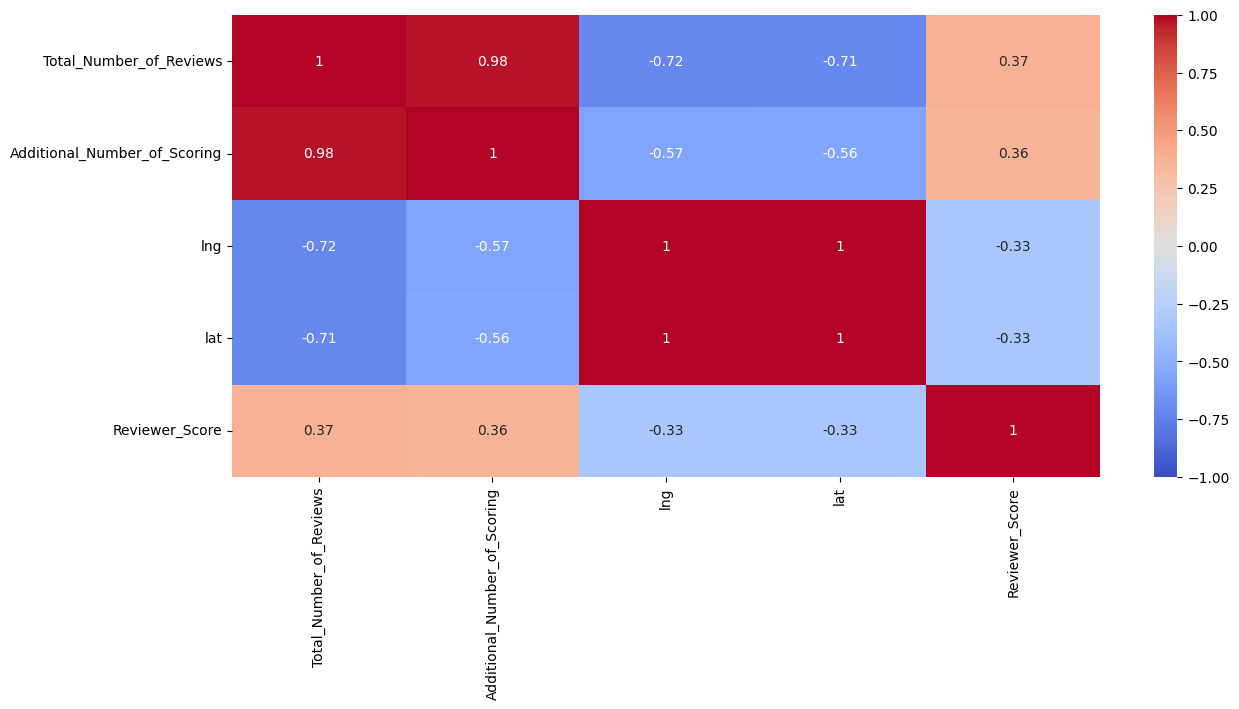

In [8]:
plt.figure(figsize=(14, 6))
sns.heatmap(data[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

In [9]:
best_params = best_params.drop(['Additional_Number_of_Scoring', 'Reviewer_Score'])

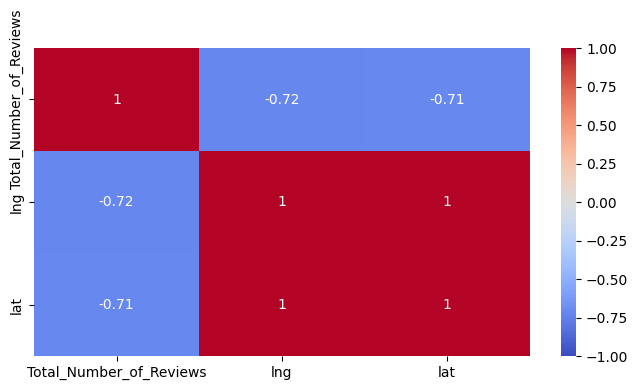

In [10]:
plt.figure(figsize=(8, 4))
sns.heatmap(data[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

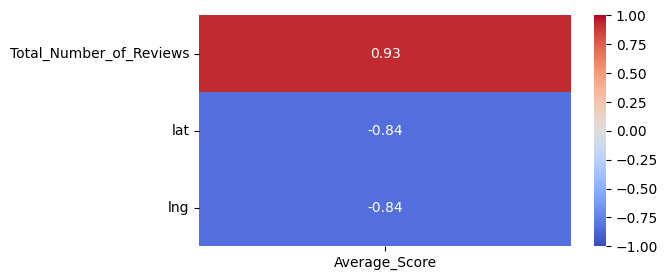

In [12]:
plt.figure(figsize=(6, 3))
sns.heatmap(pd.DataFrame(data[np.append(best_params.index.values, 'Average_Score')].corr()['Average_Score'].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

In [13]:
y = data['Average_Score']
X = data[best_params.index]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [14]:

def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [15]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print_metrics(y_test, y_pred_linear)

R^2: 1.0
MSE: 1.7758746664271208e-22
MAE: 1.2980950749569883e-11


In [16]:
poly_model = PolynomialFeatures(degree=3)
x_train_poly = poly_model.fit_transform(x_train)
x_test_poly = poly_model.fit_transform(x_test)
linear_model = LinearRegression()
linear_model.fit(x_train_poly, y_train)
y_pred_poly = linear_model.predict(x_test_poly)
print_metrics(y_test, y_pred_poly)

R^2: 1.0
MSE: 3.8398489110352158e-28
MAE: 1.9514968153840933e-14


In [17]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,Total_Number_of_Reviews,lng,lat
count,1.409000e+03,1.409000e+03,1.409000e+03
mean,1.512866e-16,1.008577e-16,-1.939999e-14
std,1.000355e+00,1.000355e+00,1.000355e+00
min,-1.475336e+00,-5.157300e-01,-5.297420e-01
25%,-6.483478e-01,-5.157300e-01,-5.297420e-01
50%,8.742373e-01,-4.724665e-01,-4.649067e-01
75%,8.742373e-01,-4.724665e-01,-4.649067e-01
max,4.276867e+00,2.048855e+00,2.048415e+00


In [18]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)])}
svm_model = SVR(kernel='linear')
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='r2')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 14.0}


In [19]:
best_svm_model = grid_cv.best_estimator_
best_svm_model = SVR(kernel='linear', C=14)
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

R^2: 0.9427495224030507
MSE: 0.020600515095923963
MAE: 0.10359069139015793


In [20]:

params = {'min_samples_leaf': range(3, 30)}
tree = DecisionTreeRegressor(random_state=3)
grid_cv = GridSearchCV(estimator=tree, cv=5, param_grid=params, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'min_samples_leaf': 3}


In [21]:

best_tree = grid_cv.best_estimator_
best_tree.fit(x_train, y_train)
y_pred_tree = best_tree.predict(x_test)
print_metrics(y_test, y_pred_tree)

R^2: 1.0
MSE: 6.910909189204745e-27
MAE: 6.44979019687691e-14


In [22]:
importances = pd.DataFrame(data=zip(x_train.columns, best_tree.feature_importances_), columns=['Признак', 'Важность'])
print('Важность признаков в дереве решений\n')
for row in importances.sort_values(by='Важность', ascending=False).values:
    print(f'{row[0]}: {round(row[1], 3)}')

Важность признаков в дереве решений

Total_Number_of_Reviews: 0.782
lat: 0.218
lng: 0.0


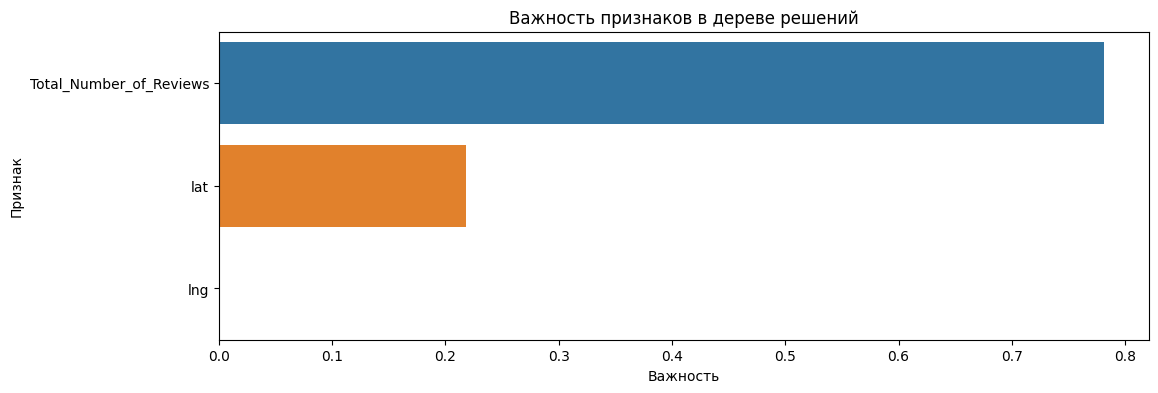

In [23]:
plt.figure(figsize=(12, 4))
sns.barplot(data=importances.sort_values(by='Важность', ascending=False), y='Признак', x='Важность', orient='h', )
plt.title('Важность признаков в дереве решений')
plt.show()

In [25]:

print('Линейная регрессия')
print_metrics(y_test, y_pred_linear)

print('\nПолиномиальная регрессия')
print_metrics(y_test, y_pred_poly)

print('\nМетод опорных векторов')
print_metrics(y_test, y_pred_svm)

print('\nДерево решений')
print_metrics(y_test, y_pred_tree)

Линейная регрессия
R^2: 1.0
MSE: 1.7758746664271208e-22
MAE: 1.2980950749569883e-11

Полиномиальная регрессия
R^2: 1.0
MSE: 3.8398489110352158e-28
MAE: 1.9514968153840933e-14

Метод опорных векторов
R^2: 0.9427495224030507
MSE: 0.020600515095923963
MAE: 0.10359069139015793

Дерево решений
R^2: 1.0
MSE: 6.910909189204745e-27
MAE: 6.44979019687691e-14
